Define the function $f:\mathbb{R}^n\to\mathbb{R}$ by $$f(x)=\sum_{i=1}^m ||x-a_i||,$$ where $a_1,\dots,a_m$ are $m$ points given in $\mathbb{R}^n$. The task is to minimize $f(x)$ over $\mathbb{R}^n$.

a) For the case where $n=2$, $m=3$ and the points $a_1,a_2,a_3$ are given as $a_1=[-6,-1]^T, a_2=[0,5]^T, \textrm{ and }a_3=[7,-8]^T$:
- Write a Python program using the subgradient method to solve the minimization problem.
- Plot the points $a_1,a_2,a_3$ and the optimal solution obtained. Draw line segments connecting the optimal solution to each point $a_i$. 

b) For the case where $n=2$ and the points $a_i$ are derived from the dataset named "USCity.xlsx" on Canvas:
- Write a Python program using the subgradient method to solve the minimization problem with the given dataset.
- Provide a visualization of the dataset and the optimal solution.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Points list of vectors (points in R^n) i.e. points = [np.array([1, 2, 3]), np.array([4, 5, 6]), ...]

def FermatTorricelli(points, tol, maxiter, alpha):
    n = 2
    m = len(points)
    x = np.zeros(n)
    subgrad = np.ones(n)
    iteration = 0
    
    def subgradient(x, points, m): 
        sg = np.zeros(n)
        for i in range(m):
            if np.linalg.norm(x - points[i]) != 0:
                sg += (x - points[i])/(np.linalg.norm(x - points[i]))
            
            else:
                unitvect = np.zeros(n)
                unitvect[0] = 1
                sg += unitvect                            
            
        return sg
                                               
                                               
    while iteration < maxiter:
        
        if np.linalg.norm(subgrad) < tol:
            print("Optimal point:", x)
            return x
            break 
                                               
        else:
            x -= (alpha * subgrad)                     
            subgrad = subgradient(x, points, m)
            iteration += 1
            if iteration == maxiter:
                print("Maximum number of iterations reached.")

### Part a)

Optimal point: [-1.26794882  0.26794956]


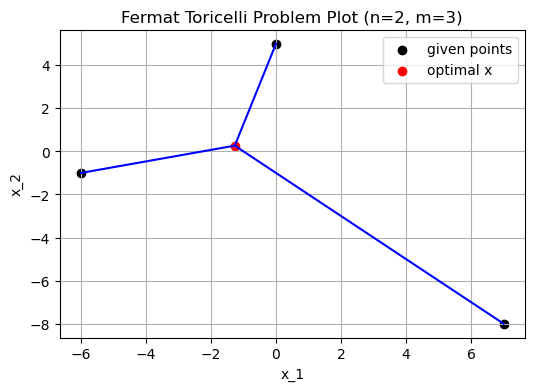

In [16]:
points = [np.array([-6, -1]), np.array([0, 5]), np.array([7, -8])]
tol = 10e-8
maxiter = 10000
alpha = 0.1

optimal_point = FermatTorricelli(points, tol, maxiter, alpha)
first_components = [point[0] for point in points]
second_components = [point[1] for point in points]
    
# Plot the points
plt.figure(figsize=(6, 4))
plt.scatter(first_components, second_components, color='black', label = "given points")
plt.scatter(optimal_point[0], optimal_point[1], color = 'red', label = "optimal x")
for point in points:
    plt.plot([point[0], optimal_point[0]], [point[1], optimal_point[1]], color='blue')
plt.title('Fermat Toricelli Problem Plot (n=2, m=3)')
plt.legend()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.grid(True)
plt.show()

### Part b)

Optimal point: [38.63476162 97.36699963]


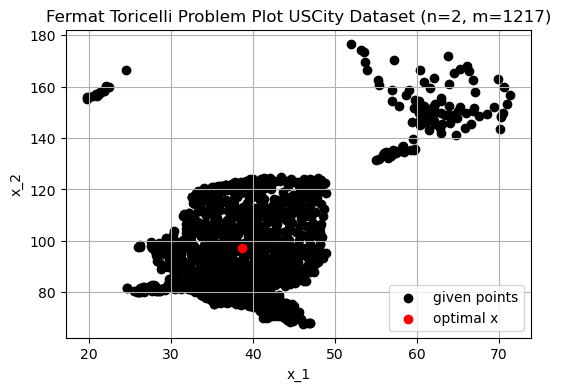

In [23]:
df = pd.read_excel('USCity.xlsx')
data = df.values
points = []
for row in data:
    array = np.array([row[0], row[1]])
    points.append(array)

tol = 10e-8
maxiter = 1000000
alpha = 0.01

optimal_point = FermatTorricelli(points, tol, maxiter, alpha)
first_components = [point[0] for point in points]
second_components = [point[1] for point in points]
    
# Plot the points
plt.figure(figsize=(6, 4))
plt.scatter(first_components, second_components, color='black', label = "given points")
plt.scatter(optimal_point[0], optimal_point[1], color = 'red', label = "optimal x")
#for point in points:
    #plt.plot([point[0], optimal_point[0]], [point[1], optimal_point[1]], color='blue')
plt.title('Fermat Toricelli Problem Plot USCity Dataset (n=2, m=1217)')
plt.legend()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.grid(True)
plt.show()